In [1]:
%%time

!pip install openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 22.1 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 MB 7.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.5 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20240930-py3-none-any.whl size=803321 sha256=580486a867ae4b745720ab1ec46e3be8b3e878331d9017ec8835f29aff37ff2a
  Stored in directory: /root/.cache/pip/wheels/dd/4a/1f/d1c4bf3b9133c8168fe617ed979cab7b14fe381d059ffb9d83
Successfully built openai-whisper
CPU times: user 520 ms, sys: 120 ms, total: 641 ms
Wall time: 33.3 s


In [2]:
%%time

!pip install openai-whisper googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.0 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=7b4b4b0a28778abbab6e79109d5f36dd03ee9d4a60cb241d2773bb4e4f80d13b
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Suc

In [3]:
%%time

import warnings
warnings.filterwarnings('ignore')

CPU times: user 40 µs, sys: 9 µs, total: 49 µs
Wall time: 52 µs


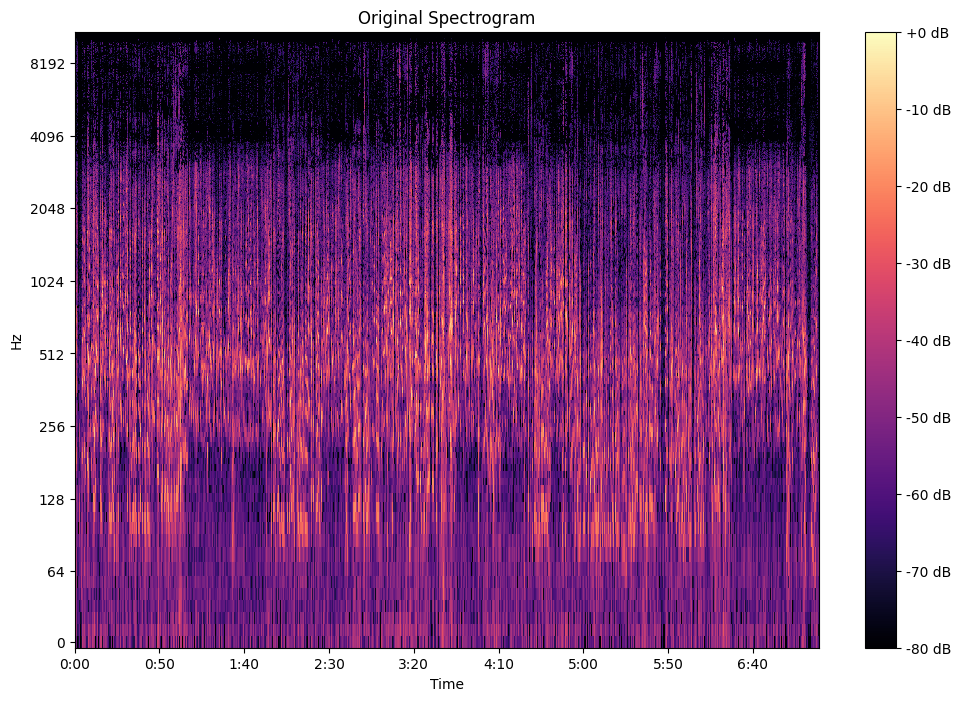

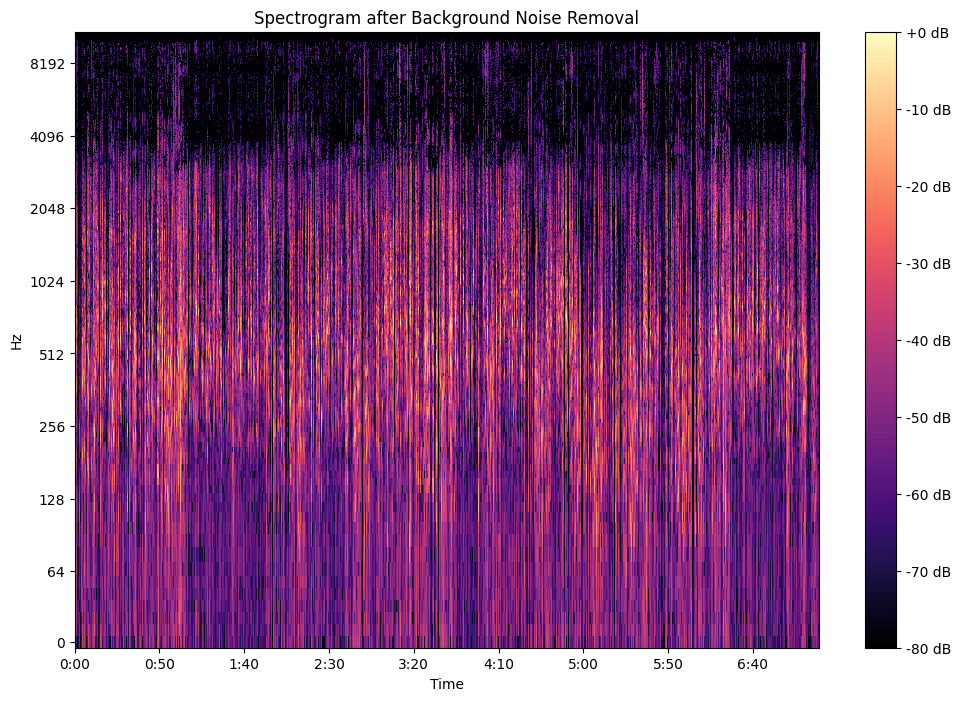

CPU times: user 1min 2s, sys: 4.88 s, total: 1min 6s
Wall time: 1min 10s


In [4]:
%%time

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import os

# Load the audio file
audio_file_path = "/kaggle/input/arabic-natural-audio-dataset/V8.wav"

# Replace with the path to your audio file
y, sr = librosa.load(audio_file_path)

# Display the original spectrogram
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 8))
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Spectrogram')
plt.show()

# Apply background noise removal
y_harmonic, y_percussive = librosa.effects.hpss(y)
y_noise_removed = y - y_harmonic

# Display the spectrogram after background noise removal
D_noise_removed = librosa.amplitude_to_db(np.abs(librosa.stft(y_noise_removed)), ref=np.max)
plt.figure(figsize=(12, 8))
librosa.display.specshow(D_noise_removed, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram after Background Noise Removal')
plt.show()

In [5]:
%%time

import whisper

# Load the Whisper model
model = whisper.load_model('base')

# Load and transcribe the audio file
audio_file = y_noise_removed
text = model.transcribe(audio_file)

# Print the transcribed text
text['text']

100%|███████████████████████████████████████| 139M/139M [00:01<00:00, 80.4MiB/s]


CPU times: user 1min 34s, sys: 1.75 s, total: 1min 36s
Wall time: 1min 33s


' والألو انت حفر خلو الو الو الو منا أسيكي منا منا زكي منا كرس محفل يا حرسي زكي أتالك كلتره حرق طاهم أشفر أنك إبتل هنا والتالف غبروك عن تالتالتال أالتالتالف غبرو نتكي الحرسي أنا أنا فهور بيجي الدنيا هنا فوق عفض حدثت بالتحزيد لما تبقق بيجي حاجة فهرت بالحرسي نعم أنا باتز باتزب باق مش مش مش باق منيك با السب باق指عنا المعالمة النتابة بت tablespoons ل ايش lifecycle الرجناية ونرى كiquement ايف great لدي систام ما تريده قوش رفios من أسكى الرحب وكيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف لكأنها أرتح لا الجديد وال GG وب long time time and & for Mal assistance for the Atatat . INTRO Team right , right , right , right , right , right , right , right , right , right , right , right , right ,

In [6]:
%%time

print(text)

{'text': ' والألو انت حفر خلو الو الو الو منا أسيكي منا منا زكي منا كرس محفل يا حرسي زكي أتالك كلتره حرق طاهم أشفر أنك إبتل هنا والتالف غبروك عن تالتالتال أالتالتالف غبرو نتكي الحرسي أنا أنا فهور بيجي الدنيا هنا فوق عفض حدثت بالتحزيد لما تبقق بيجي حاجة فهرت بالحرسي نعم أنا باتز باتزب باق مش مش مش باق منيك با السب باق指عنا المعالمة النتابة بت tablespoons ل ايش lifecycle الرجناية ونرى كiquement ايف great لدي систام ما تريده قوش رفios من أسكى الرحب وكيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف ترى كيف لكأنها أرتح لا الجديد وال GG وب long time time and & for Mal assistance for the Atatat . INTRO Team right , right , right , right , right , right , right , right , right , right , right , right 

In [7]:
%%time

result = model.transcribe(audio_file, language='ar')

CPU times: user 1min 44s, sys: 566 ms, total: 1min 45s
Wall time: 1min 40s


In [8]:
%%time

result

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


{'text': " الع quo أصدعس أنا ست Pittsburgh اليوم اليوم اليوم أنتي يصم gonna tweak ache أنا良 though حيث iyسbuch كان المفكم الط headlinesك sort is الطاني Hebrew ت受و fav أتشا administer house فقط كانت офر أتشاهدو فيها الفترة التي تدمس فيها رسولة المنزل لا زغني ويلا لا فقط دعها بردة كلا حب التحي في التسكيل أطلع يعني ما نفتنك علي نا فتنك علي نا فتنك عليك إن كنت دخل من الحفين و بعمائة تنتهن فوشي و الداني كلا و تيك فضاني فيها فضاني أمشي و تلك أفضاني مسيلية نوري بعمل سوفًا تدوكillerب اع gebن له speak right لتعالى انه استطاع محمد اللغوة اللقوية ونعالي تلطش الثانا انا اده رايد روحت خاتك كورس كلا مردتة حي حي وسنحة دين اتنا انا عمر مكتحكت في ايش التفمام والله العبين معمر مكتحكت ولحدها يكنها على قوية ولا عاق ويأتي انا اشتغلت معنا كتيرا الحب في النائق ونحب في كويه بثحي يوصد صحمة حطيه اتستنيه ويولى الاتس اللوصد صحمة حطوهودي انا عمر مكتحارة اشيعني اكتاهم اخنان الاتس دوانت حيجا يعني انا بزينه بالفضل الأول والأحير هيا انا اكتلسة بكاله مرده مهمد بول ام رفي اشتغلوا فرسي ام تبين يوصد للمسل او اكتل بجو او ا

In [9]:
%%time

from googletrans import Translator
import whisper

# Load Whisper model
model = whisper.load_model('base')

# Transcribe the audio
audio_file = "/kaggle/input/arabic-natural-audio-dataset/V8.wav"
result = model.transcribe(audio_file)

# Translate the transcribed text into English
transcribed_text = result.get('text')
if transcribed_text:
    translator = Translator()
    translated_result = translator.translate(transcribed_text, dest='en')

# Print the translated text
    print("Translated Text:", translated_result.text)
else:
    print("Error: Transcription result is empty. Cannot proceed with translation.")

Translated Text: This information is to avoid a defect ğimreat, a luxury between his lifting, and God is great from her with the dead from Ail eI want to want to build Qenaya, but in your grandfather, I will help you, because I also do not want the first of it.A neighborhood, and Muhammad al -Din repelled the basis.Through the basis, a variety of pilgrims.The second is a boredom of Al -Tarimi, a moral and second bubble, and you have respect for the honor of the profession, and I am very confused, my behavioral, and the prosecutor of the Salim.Muhammad closed and you are a Lord of death in a very much death, and you are very welcome.Muhammad is closed to you in the foam and you will be in you in the alsoAnd a desert in the Gulf of the Gulf of your writers, here is the highest dress in the highest dress, where?أتف لأتف لأعلى أفستان أعلى نفنوفي أعلى نفنوفي هذا النفنوف بايد غالي غالي كتير أعلى فكرة أو اللي ظذنا مع weighted مرة الم concentratesite منك könnten أو أضغر paperget وALKي إمي بالس